<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supply-Chain-Management" data-toc-modified-id="Supply-Chain-Management-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Supply Chain Management</strong></a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective</a></span></li></ul></li><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Importing libraries</strong></a></span></li><li><span><a href="#Read-the-clean-data" data-toc-modified-id="Read-the-clean-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Read the clean data</strong></a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Encode-the-cateogrical-features" data-toc-modified-id="Encode-the-cateogrical-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Encode the cateogrical features</a></span></li><li><span><a href="#RFE-for-feature-selection" data-toc-modified-id="RFE-for-feature-selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RFE for feature selection</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-model" data-toc-modified-id="Linear-Regression-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Regression model</a></span><ul class="toc-item"><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Plot-The-true-vs-predicted-values" data-toc-modified-id="Plot-The-true-vs-predicted-values-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Plot The true vs predicted values</a></span></li></ul></li><li><span><a href="#Xgboost-model" data-toc-modified-id="Xgboost-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Xgboost model</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Tuning-the-model" data-toc-modified-id="Tuning-the-model-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Tuning the model</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Plot-The-true-vs-predicted-values" data-toc-modified-id="Plot-The-true-vs-predicted-values-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Plot The true vs predicted values</a></span></li><li><span><a href="#Save-the-Xgbost-model" data-toc-modified-id="Save-the-Xgbost-model-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Save the Xgbost model</a></span></li></ul></li></ul></li></ul></div>

# **Supply Chain Management**

**Predictive Analytics for Sustainable Supply Chain Management Using Machine Learning**



## Objective
The primary objective of this project is to develop a machine learning model that predicts the **Supply Chain Risk (%)** of companies based on their supply chain management (SCM) practices, technology utilization, and sustainability efforts. By accurately forecasting Supply Chain Risk ratio, the model will help companies optimize their supply chain operations, reduce costs, and enhance overall performance.

**Develop a Predictive Model for Supply Chain Risk**
* `Use machine learning algorithms to predict the Supply Chain Risk ratio based on variables like Agile SCM, Lean Manufacturing, Supplier Count, Recycling Rate, and Use of Renewable Energy.`

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pingouin as pg
pd.plotting.register_matplotlib_converters()
%matplotlib inline
from IPython. display import display
from itertools import combinations
from collections import Counter


# pre_preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler , MinMaxScaler,PolynomialFeatures,RobustScaler

import sklearn.feature_selection


# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Valdiation
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold , GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score , median_absolute_error , mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#display all column of df 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
# to format the scientific presntastion of numbers 
pd.options.display.float_format = '{:.2f}'.format 


# **Read the clean data**

In [3]:
# read the data
Clean_data = pd.read_csv("/Users/admin/Data science/Data science EpsilonAI/EpsilonAI-course-ML/Final Project/SCM/Data/Clean_df.csv")
train = pd.read_csv("/Users/admin/Data science/Data science EpsilonAI/EpsilonAI-course-ML/Final Project/SCM/Data/Train.csv")
test = pd.read_csv("/Users/admin/Data science/Data science EpsilonAI/EpsilonAI-course-ML/Final Project/SCM/Data/Test.csv")

In [4]:
Clean_data.shape , train.shape , test.shape

((150776, 25), (105543, 25), (45233, 25))

In [5]:
# Our Target variable
Target = "Supply Chain Risk (%)"

In [6]:
train.head()

,SCM Practices,Technology Utilized,Supply Chain Agility,Supply Chain Integration Level,Supply Chain Complexity Index,Supplier Collaboration Level,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Supplier Lead Time Variability (days),Inventory Accuracy (%),Transportation Cost Efficiency (%),Cost of Goods Sold (COGS),Operational Efficiency Score,Revenue Growth Rate out of (15),Supply Chain Risk (%),Supply Chain Resilience Score,Supplier Relationship Score,Total Implementation Cost,Carbon Emissions (kg CO2e),Recycling Rate (%),Use of Renewable Energy (%),Green Packaging Usage (%)
0,Vendor Managed Inventory,"AI, ERP, Robotics",Medium,Medium,Medium,High,3630.11,7.88,8.90,91.14,90.02,3.37,97.82,80.00,782.15,83.62,9.40,10.14,85.80,82.00,54233964.13,597126.98,65.94,52.40,43.80
1,Agile SCM,"AI, ERP, Robotics",High,Medium,High,Medium,125.01,11.53,11.09,94.23,92.82,3.22,98.11,80.00,1324.74,83.20,10.90,7.39,89.60,88.00,51394922.31,1105567.09,60.85,64.30,51.14
2,Just-In-Time,"AI, Blockchain, ERP",Medium,High,Medium,High,88265.38,5.13,13.13,92.51,90.69,3.58,97.56,80.00,745.44,87.22,9.80,8.04,88.90,86.30,24827346.81,926310.03,60.00,64.00,49.78
3,Vendor Managed Inventory,"AI, Blockchain, ERP",High,High,High,High,15718.04,7.39,13.65,90.75,92.16,3.63,97.37,80.00,1011.04,86.21,9.20,10.25,87.50,85.00,93925753.98,136242.40,69.15,59.00,40.11
4,Vendor Managed Inventory,"ERP, JIT, Robotics",High,High,Low,High,125.00,11.12,13.91,88.76,90.46,4.49,98.14,80.00,504.77,83.83,9.20,11.54,86.00,82.60,88667015.23,183595.16,63.79,50.50,54.35


In [7]:
num = list(train.select_dtypes(exclude="O").columns)
cat = list(train.select_dtypes(include="O").columns)
train[num].corrwith(train[Target])

Supplier Count                          -0.05
Inventory Turnover Ratio                -0.07
Lead Time (days)                         0.85
Order Fulfillment Rate (%)              -0.85
Customer Satisfaction (%)               -0.11
Supplier Lead Time Variability (days)    0.82
Inventory Accuracy (%)                  -0.17
Transportation Cost Efficiency (%)      -0.01
Cost of Goods Sold (COGS)               -0.34
Operational Efficiency Score            -0.25
Revenue Growth Rate out of (15)         -0.53
Supply Chain Risk (%)                    1.00
Supply Chain Resilience Score           -0.87
Supplier Relationship Score             -0.75
Total Implementation Cost               -0.02
Carbon Emissions (kg CO2e)               0.01
Recycling Rate (%)                      -0.01
Use of Renewable Energy (%)             -0.00
Green Packaging Usage (%)                0.01
dtype: float64

# Feature Selection

## Encode the cateogrical features

In [8]:
le = LabelEncoder()
df = pd.concat([train, test])
for f in cat:
    le.fit(df[f])
    train[f] = le.transform(train[f])
    test[f] = le.transform(test[f]) 
    
    
X = train.drop(Target , axis=1)
y = train[Target]

In [20]:
import pickle

# Create LabelEncoders for categorical features
label_encoders = {
    'Technology Utilized': LabelEncoder(),
    'Supply Chain Integration Level': LabelEncoder(),
    'Supplier Collaboration Level': LabelEncoder()
}

# Fit the LabelEncoders with your training data
label_encoders['Technology Utilized'].fit(train['Technology Utilized'])
label_encoders['Supply Chain Integration Level'].fit(train['Supply Chain Integration Level'])
label_encoders['Supplier Collaboration Level'].fit(train['Supplier Collaboration Level'])

# Save the encoders
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

## RFE for feature selection

In [9]:
from sklearn.feature_selection import RFE

model1 = XGBRegressor(random_state=42)
model2 = LinearRegression()

X = train.drop(Target, axis=1)
y = train[Target]
# Initialize RFE with the model and select the top 15 features

selector_xgb = RFE(model1, n_features_to_select=15, step=1)
selector_xgb = selector_xgb.fit(X, y)

selector_lr = RFE(model2, n_features_to_select= 10, step=1)
selector_lr = selector_lr.fit(X, y)
# Print the selected features
# Get the boolean mask indicating selected features
selected_mask1 = selector_xgb.support_
selected_mask2 = selector_lr.support_


# Use the mask to filter the column names from the DataFrame
selected_features_xgb = X.columns[selected_mask1].tolist()
selected_features_lr = X.columns[selected_mask2].tolist()


print("Selected features for XGBOOST model:\n", selected_features_xgb)
print("Selected features for LEINEAR REGESSION:\n", selected_features_lr)

Selected features for XGBOOST model:
 ['Technology Utilized', 'Supply Chain Integration Level', 'Supplier Collaboration Level', 'Lead Time (days)', 'Order Fulfillment Rate (%)', 'Supplier Lead Time Variability (days)', 'Inventory Accuracy (%)', 'Transportation Cost Efficiency (%)', 'Cost of Goods Sold (COGS)', 'Operational Efficiency Score', 'Revenue Growth Rate out of (15)', 'Supply Chain Resilience Score', 'Supplier Relationship Score', 'Recycling Rate (%)', 'Use of Renewable Energy (%)']
Selected features for LEINEAR REGESSION:
 ['Supply Chain Agility', 'Supply Chain Integration Level', 'Supplier Collaboration Level', 'Lead Time (days)', 'Order Fulfillment Rate (%)', 'Supplier Lead Time Variability (days)', 'Inventory Accuracy (%)', 'Revenue Growth Rate out of (15)', 'Supply Chain Resilience Score', 'Supplier Relationship Score']


# Modeling

## Linear Regression model

In [10]:
X_lr = train[selected_features_lr]
y_lr = train[Target]

num_lr = list(X_lr.select_dtypes(exclude="O").columns)
cat_lr = list(X_lr.select_dtypes(include="O").columns)

# Model
lr = LinearRegression()



# Pipline for the model

preprocessor1 = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(),cat_lr+num_lr),
        ('poly', PolynomialFeatures(degree=3),num_lr)])
  
        
pipeline1 = Pipeline(steps=[("preprocessor1", preprocessor1)
                            ,('model', lr)])
train_scores =[]
val_scores = []

num_splits = 7

kf = KFold(n_splits= num_splits, shuffle=True, random_state=41)

for fold, (train_index, val_index) in enumerate(kf.split(X_lr,y_lr)):

    print(f"Fold {fold +1}")

    X_train , y_train = X.iloc[train_index], y.iloc[train_index]
    X_val , y_val = X.iloc[val_index], y.iloc[val_index]

    pipeline1.fit(X_train,y_train)

    train_pred = pipeline1.predict(X_train)
    
    train_scores.append(r2_score(y_train, train_pred))
    print(f"train mean squar error => {mean_squared_error(y_train,train_pred):.5f}")

    val_pred = pipeline1.predict(X_val)
    val_scores.append(r2_score(y_val, val_pred))

    print(f"validation mean squar error => {mean_squared_error(y_val ,val_pred):.5f}")
    print("_"*20)
    
print(f"Mean Train score :{np.mean(train_scores):.5f}")
print(f"Mean validation score :{np.mean(val_scores):.5f}")



Fold 1
train mean squar error => 0.63540
validation mean squar error => 0.64619
____________________
Fold 2
train mean squar error => 0.63732
validation mean squar error => 0.63478
____________________
Fold 3
train mean squar error => 0.63746
validation mean squar error => 0.63407
____________________
Fold 4
train mean squar error => 0.63828
validation mean squar error => 0.62882
____________________
Fold 5
train mean squar error => 0.63537
validation mean squar error => 0.64658
____________________
Fold 6
train mean squar error => 0.63706
validation mean squar error => 0.63659
____________________
Fold 7
train mean squar error => 0.63434
validation mean squar error => 0.65265
____________________
Mean Train score :0.91117
Mean validation score :0.91067


### Evaluate the model

In [11]:
X_testlr = test[selected_features_lr]
y_testlr = test[Target]

test_pred = pipeline1.predict(X_testlr)

print(f"Test mean squar error => {mean_squared_error(y_testlr,test_pred):.5f}")
print("Test R2_Score", r2_score(y_testlr, test_pred))

Test mean squar error => 0.63461
Test R2_Score 0.9118776209224136


### Plot The true vs predicted values

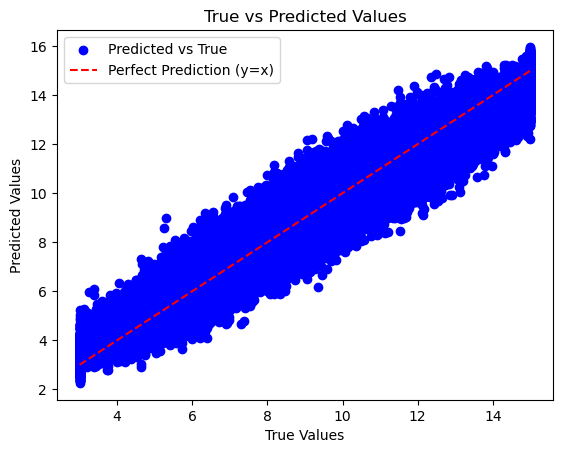

In [12]:
true_values = y_testlr
predicted_values = test_pred
plt.scatter(true_values, predicted_values, color='blue', label='Predicted vs True')

# Add a reference line (y = x) to see how close predictions are to actual values
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--', label='Perfect Prediction (y=x)')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Xgboost model

### Tuning the model

In [14]:
X_xgb = train[selected_features_xgb]
y_xgb = train[Target]

X_xgb.drop(['Cost of Goods Sold (COGS)','Supplier Collaboration Level',
            'Transportation Cost Efficiency (%)'], axis=1,inplace=True)

num_xgb = list(X_xgb.select_dtypes(exclude="O").columns)
cat_xgb = list(X_xgb.select_dtypes(include="O").columns)

# Model
xgb = XGBRegressor(random_state = 42)

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0,0.6]
}

# Set up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='r2')

# Fit the model
grid_search_xgb.fit(X_xgb, y_xgb)

# Get the best parameters and score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Best Cross-Validation Score for XGBoost: {best_score_xgb:.4f}")

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best Cross-Validation Score for XGBoost: 0.9112


### Training

In [16]:

# Model
xgb = grid_search_xgb.best_estimator_


# Pipline for the model

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(),num_xgb),
        ('cat', OneHotEncoder(drop='first'),cat_xgb)
    ])
        
        
pipeline2 = Pipeline(steps=[("preprocessor2", preprocessor2)
                            ,('model',  xgb)])
train_scores =[]
val_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_xgb,y_xgb)):

    print(f"Fold {fold +1}")

    X_train , y_train = X.iloc[train_index], y.iloc[train_index]
    X_val , y_val = X.iloc[val_index], y.iloc[val_index]

    pipeline2.fit(X_train,y_train)

    train_pred = pipeline2.predict(X_train)
    
    train_scores.append(r2_score(y_train, train_pred))
    print(f"train mean squar error => {mean_squared_error(y_train,train_pred):.5f}")

    val_pred = pipeline2.predict(X_val)
    val_scores.append(r2_score(y_val, val_pred))

    print(f"validation mean squar error => {mean_squared_error(y_val ,val_pred):.5f}")
    print("_"*20)
    
print(f"Mean Train score :{np.mean(train_scores):.5f}")
print(f"Mean validation score :{np.mean(val_scores):.5f}")

Fold 1
train mean squar error => 0.61659
validation mean squar error => 0.64174
____________________
Fold 2
train mean squar error => 0.61630
validation mean squar error => 0.63705
____________________
Fold 3
train mean squar error => 0.61783
validation mean squar error => 0.63339
____________________
Fold 4
train mean squar error => 0.61894
validation mean squar error => 0.61938
____________________
Fold 5
train mean squar error => 0.61767
validation mean squar error => 0.63815
____________________
Fold 6
train mean squar error => 0.61911
validation mean squar error => 0.63301
____________________
Fold 7
train mean squar error => 0.61499
validation mean squar error => 0.65079
____________________
Mean Train score :0.91384
Mean validation score :0.91119


### Evaluate the model

In [17]:
X_testxgb = test[selected_features_xgb]
y_testxgb = test[Target]

xgb_pred = pipeline2.predict(X_testxgb)

print(f"Test mean squar error => {mean_squared_error(y_testxgb,xgb_pred):.5f}")
print("Test R2_Score", r2_score(y_testlr, xgb_pred))

Test mean squar error => 0.62964
Test R2_Score 0.9125669936592448


### Plot The true vs predicted values

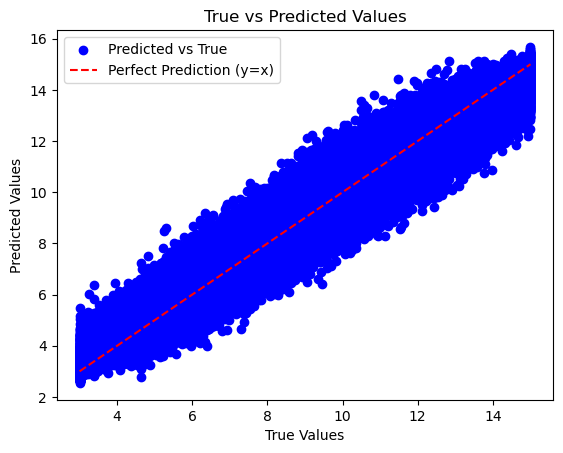

In [18]:
true_values = y_testxgb
predicted_values = xgb_pred
plt.scatter(true_values, predicted_values, color='blue', label='Predicted vs True')

# Add a reference line (y = x) to see how close predictions are to actual values
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--', label='Perfect Prediction (y=x)')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

### Save the Xgbost model

In [21]:
import pickle
# Save the pipeline to a file
with open('Xgb_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline2, file)

In [22]:
with open('Xgb_pipeline.pkl', 'rb') as file:
    Xgboost_model = pickle.load(file)

In [23]:
pred = Xgboost_model.predict(X_testxgb)

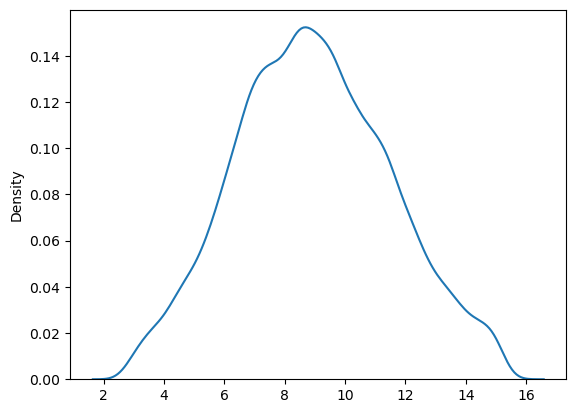

In [24]:
sns.kdeplot(pred)
plt.show()